In [2]:
import numpy as np
import pandas as pd

In [42]:
numericals = pd.read_pickle('numerical_new.pkl')
categoricals = pd.read_pickle('categorical_new.pkl')
target = pd.read_csv('files_for_lesson_and_activities/target.csv')

# saving a dataframe to pickle
# pd.to_pickle(dataframe, 'my_pickle.pkl')

# First part: More systematic approaches for feature selection

## Variance Threshold

In [ ]:
# first standardize the features!

In [46]:
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [10]:
sel = VarianceThreshold(threshold=(.9))
sel = sel.fit(numericals)
temp = sel.transform(numericals)

In [14]:
temp.shape

(95412, 317)

In [15]:
numericals.shape

(95412, 335)

In [18]:
# variances for every feature
sel.variances_

array([1.17959931e+05, 9.09809748e+05, 4.54640529e+06, 2.08815897e+02,
       1.17959931e+05, 7.52110028e+00, 8.66174573e+01, 2.56592472e+01,
       1.31572233e+02, 2.27939712e+02, 3.13607695e+02, 1.92868188e+01,
       2.62819398e+01, 1.72652418e+01, 7.85530474e+00, 3.29841989e+07,
       2.12604334e+06, 4.50749041e+06, 2.24965472e+03, 9.74807925e+02,
       1.60301299e+03, 3.09753487e+01, 3.32736401e+01, 4.41578315e+02,
       2.78578917e+02, 1.20360456e+01, 4.99809732e+01, 1.90053487e+02,
       4.61409700e-01, 4.98251426e+00, 6.41978865e+00, 5.33237152e+00,
       1.00706114e+00, 1.11115939e+00, 1.36811691e+00, 1.28447653e+02,
       1.67136727e+00, 1.02953264e+01, 1.13250253e+01, 6.94817913e+01,
       6.80563524e+01, 6.57568628e+01, 5.27246856e+01, 4.84411762e+01,
       4.73710296e+01, 5.64791144e+01, 6.77692565e+01, 4.07109305e+01,
       3.39562669e+01, 3.68229986e+01, 6.06488198e+01, 3.85766793e+01,
       1.86306173e+01, 1.71850636e+01, 3.60457837e+01, 4.52079107e+01,
      

In [24]:
# all features that were dropped:
numericals.columns[sel.variances_ <= .9]

Index(['ETH6', 'TPE6', 'TPE7', 'ANC5', 'ANC6', 'ANC11', 'ANC15', 'HC15',
       'MHUC2', 'ADATE_2', 'ADATE_3', 'ADATE_6', 'ADATE_9', 'ADATE_11',
       'ADATE_12', 'ADATE_14', 'ADATE_16', 'HPHONE_D'],
      dtype='object')

In [25]:
# all feature that were kept
numericals.columns[sel.variances_ > .9]

Index(['ODATEDW', 'TCODE', 'DOB', 'AGE', 'INCOME', 'WEALTH1', 'HIT',
       'MALEMILI', 'MALEVET', 'VIETVETS',
       ...
       'MAXRDATE', 'LASTGIFT', 'LASTDATE', 'FISTDATE', 'NEXTDATE', 'TIMELAG',
       'AVGGIFT', 'CONTROLN', 'RFA_2F', 'CLUSTER2'],
      dtype='object', length=317)

In [27]:
new_cols = list(numericals.columns[sel.variances_ > .9])

In [28]:
numericals[new_cols]

,ODATEDW,TCODE,DOB,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC7,ANC8,ANC9,ANC10,ANC12,ANC13,ANC14,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,AC1,AC2,ADATE_4,ADATE_7,ADATE_8,ADATE_18,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,RFA_2F,CLUSTER2
0,8901,0,3712,60.000000,8901,NaN,0,0,39,34,18,10,2,1,5.0,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,5,1,0,0,0,0,2,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,33,65,40,99,99,6,10,7,9604.0,9602.0,9601.0,9501.0,27,9702,74,6,14,240.0,31,14,5.0,9208,12.0,9402,10.0,9512,8911,9003.0,4.0,7.741935,95515,4,39.0
1,9401,1,5202,46.000000,9401,9.0,16,0,15,55,11,6,2,1,9.0,3611,940,998,99,0,0,50,50,67,0,0,31,6,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,2,3,1,1,3,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,99,0,99,99,99,20,6,5,9604.0,9602.0,9601.0,NaN,12,9702,32,6,13,47.0,3,1,10.0,9310,25.0,9512,25.0,9512,9310,9504.0,18.0,15.666667,148535,2,1.0
2,9001,1,0,61.611649,9001,1.0,2,0,20,29,33,6,8,1,1.0,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,

In [33]:
removed_columns = pd.DataFrame(data=(numericals.columns,
                                    sel.variances_,
                                     sel.get_support()),
                              index=('column_name', 'variance', 'statement')).T

In [34]:
removed_columns

,column_name,variance,statement
0,ODATEDW,117960,True
1,TCODE,909810,True
2,DOB,4.54641e+06,True
3,AGE,208.816,True
4,INCOME,117960,True
...,...,...,...
330,AVGGIFT,115.992,True
331,CONTROLN,3.05635e+09,True
332,HPHONE_D,0.25,False
333,RFA_2F,1.15078,True


In [29]:
# get the boolean table for all features whether they pass the threshold
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Question: Why not using PEarson as filter?

Pearson correlation: $$P_{x,y} = \frac{\text{cov}(X, Y)}{\sigma_Y * \sigma_Y}$$

Answer: You can do both

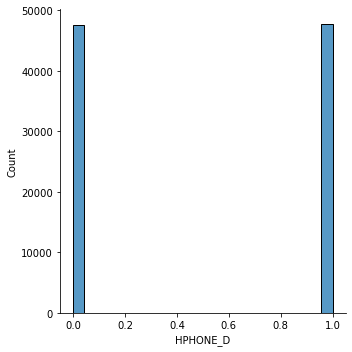

In [38]:
sns.displot(numericals['HPHONE_D'])

# Activity 1

In [41]:
target

Index(['version https://git-lfs.github.com/spec/v1'], dtype='object')

In [43]:
X = numericals
y = target['TARGET_B']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
kbest = SelectKBest(chi2, k=10).fit_transform(X, y)
# Here we chose 10 so that is easier to analyze results later, as we will see
selected = pd.DataFrame(kbest)
selected.head()

# To check the scores
model = SelectKBest(chi2, k=10).fit(X, y)
df = pd.DataFrame(data = model.scores_, columns = ['score'])
df['Column'] = numericals.columns
print(df.sort_values(by = ['score'], ascending = False).head(10))

cols = df.sort_values(by = ['score'], ascending = False).head(10)['Column']
cols



KeyError: 'TARGET_B'

# Recursive Feature Elimination (RFE)
(wrapper method, works in a backward elimination way, Documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html))

In [ ]:
from sklearn.feature_selection import RFE
from sklearn import linear_model

# change this to a classifier, since we're predicting a categorical variable. Or use logistic regression.
lm = linear_model.LinearRegression()
rfe = RFE(lm, n_features_to_select=20, verbose=False)
rfe.fit(X, y)

# After we run the algorithm, it labels the top features as 1 and the rest are
# marked in an increasing order of importance.
df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
df['Column_name'] = X.columns
df[df['Rank']==1]

# Intro to Inferential statistics

* **Descriptive statistics**:
    * mean, median, mode, frequency (histograms), standard deviation, variance
    * no uncertainty re: how to calculate those values
    
* **Inferential statistics**:
    * inferences: helps us to draw inferences from a sample to the whole population
    * given new data, how can update what I know about my population
    * think A/B testing
    
Why only a sample? -> financial, HR, ... constraints....

* **Hypothesis testing**
    * tool used to draw inferences on the population from the sample data
    * **Null Hypothesis**: $H_0$,
        * "The suspect is not guilty"
        * "The drug I'm testing has no effect"
        * "There is no god particle (Higgs Boson)"
        * The sample mean $\mu_0$ is **no** different than the population mean $\mu$
    * **Alternative Hypothesis**: $H_1$, $H_\alpha$...
        * "The suspect is guilty"
        * "The drug has an effect"
        * "There is a Higgs Boson"
        the effect is real. Or: The sample mean is different from the population mean
    * **Level of significance**:
        * we use that to indicate whether we are confident enough to reject the null hypothesis aka verifying the effect
        * alpha = 1 - confindence intervall (CI)
        * How confident do I have to be to accept new evidence (meaning the H1)
        * usual the alpha is said to be 5%, when stricter to accept new evidence: alpha is 3%, 1%
        * alpha for Higgs Boson 0.00003%
    * **Test statistic**. Calculated result which we compare to our level of significance in order to decide whether to reject $H_0$ and accept $H_\alpha$... which is the...
    * **p-value** is a measure used to help us in the decision whether to reject $H_0$
        * P( measuring that there is an effect| Null hypothesis is true = there is actually no effect)
        * if p-value is small, meaning, below the level of significance, then I will reject the null hypothesis and accept H_a
    
 * Side note: P(A|B) - means: propability that A occurs when B has occured.

**<end of day 2nd of march>**

# Recap central limit theorem (do understand why we can infer statements about the population from a sample in the first place)

In [ ]:
import seaborn as sns
import numpy as np

# this is what I'm sampling from now:
# sns.distplot(np.random.exponential(size=5000))